## Using pandas to explore Crime Data

I downloaded data from Avon & Sumerset Constabulary, Cleveland Police, Greater Manchester Police, and the Metropolitan Police Service between 2016 and 2018.

`%matplotlib inline` shows graphs while inside jupyter.

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import chain

%matplotlib inline

`find_recursive_csv_files` is a helper function to help load all of the csvs, and combine them into one.

In [2]:
def find_recursive_csv_files(location='.'):
    foo = []
    for root, subdirs, files in os.walk(location):
        foo.extend([(root + '/' + x) for x in files if x[-4:] == '.csv'])
    return foo

[pd.read_csv - docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)  
[pd.concat - docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)
[df.info - docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)
[df.head - docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)


This cell includes reading multiple CSVs with a list comprehension, and concatenating that list of CSVs via `pd.concat`.

`df.info()` gives information about the dataset  
`df.head()` shows the top 5 rows of the dataset

In [6]:
df = pd.concat([pd.read_csv(x, index_col='Crime ID', parse_dates=[1]) for x in find_recursive_csv_files()])

df['Reported by'] = df['Reported by'].astype('category')
df['Falls within'] = df['Falls within'].astype('category')
df['LSOA code'] = df['LSOA code'].astype('category')
df['LSOA name'] = df['LSOA name'].astype('category')
df['Crime type'] = df['Crime type'].astype('category')


print df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2846498 entries, nan to 7bad62c81c7ac991e71bf939838f43c71637b78f072f5bf8b2f7914c757df19a
Data columns (total 11 columns):
Month                    datetime64[ns]
Reported by              category
Falls within             category
Longitude                float64
Latitude                 float64
Location                 object
LSOA code                category
LSOA name                category
Crime type               category
Last outcome category    object
Context                  float64
dtypes: category(5), datetime64[ns](1), float64(3), object(2)
memory usage: 171.8+ MB
None


,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
Crime ID,,,,,,,,,,,
NaN,2017-06-01,Cleveland Police,Cleveland Police,-1.131184,54.497575,On or near Newton Road,E01027598,Hambleton 002A,Anti-social behaviour,NaN,NaN
NaN,2017-06-01,Cleveland Police,Cleveland Police,-1.237110,54.713510,On or near Porrett Close,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
NaN,2017-06-01,Cleveland Police,Cleveland Police,-1.237805,54.711196,On or near King Oswy Shops,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
NaN,2017-06-01,Cleveland Police,Cleveland Police,-1.238182,54.712627,On or near Hood Close,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
NaN,2017-06-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN


# Which LSOA has the most Crimes?

[df.groupby - docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

df.groupby is a very powerful function, it groups the data along the axis s


In [90]:
df.groupby('LSOA code') \
    .agg('size') \
    .sort_values(ascending=False) \
   .head()

LSOA code
E01033658    13251
E01033653    12736
E01033595    11784
E01004734     9863
E01004763     8404
dtype: int64

# How how total numbers of crimes changed over time for different Police forces?

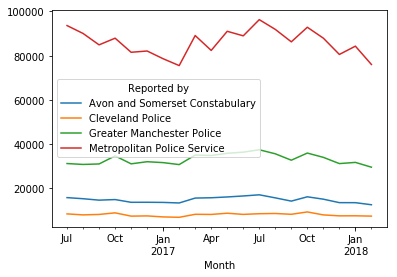

In [102]:
df.set_index('Month') \
    .groupby([pd.Grouper(freq='M'), 'Reported by']) \
    .agg('size') \
    .unstack() \
    .plot(kind='line')
    

# Crime types over time

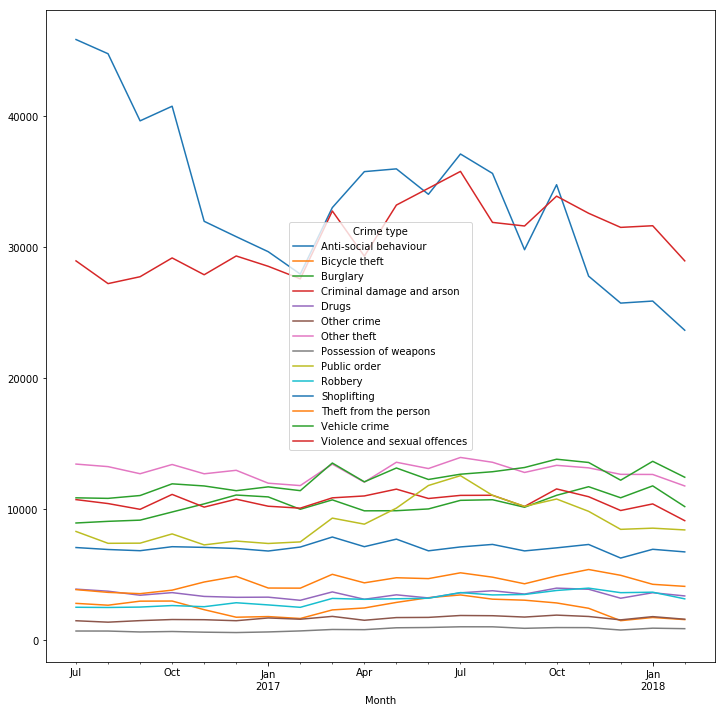

In [110]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

df.set_index('Month') \
    .groupby([pd.Grouper(freq='M'), 'Crime type']) \
    .agg('size') \
    .unstack() \
    .plot(kind='line', ax=ax)
    

In [114]:
df.set_index('Month') \
    .groupby([pd.Grouper(freq='M'), 'Reported by', 'Crime type']) \
    .agg('size') \
    .unstack()
    

Crime type                                 Anti-social behaviour  \
Month      Reported by                                             
2016-07-31 Avon and Somerset Constabulary                   3539   
           Cleveland Police                                 4212   
           Greater Manchester Police                       11966   
           Metropolitan Police Service                     26144   
2016-08-31 Avon and Somerset Constabulary                   3441   
           Cleveland Police                                 3888   
           Greater Manchester Police                       11773   
           Metropolitan Police Service                     25673   
2016-09-30 Avon and Somerset Constabulary                   2822   
           Cleveland Police                                 3912   
           Greater Manchester Police                       10762   
           Metropolitan Police Service                     22153   
2016-10-31 Avon and Somerset Constabulary                   3064   
           Cleveland Police                                 4273   
           Greater Manchester Police                       10705   
           Metropolitan Police Service                     22724   
2016-11-30 Avon and Somerset Constabulary                   2357   
           Cleveland Police                                 3150   
           Greater Manchester Police                        7790   
           Metropolitan Police Service                     18678   
2016-12-31 Avon and Somerset Constabulary                   2526   
           Cleveland Police                                 3146   
           Greater Manchester Police                        7597   
           Metropolitan Police Service                     17533   
2017-01-31 Avon and Somerset Constabulary                   2391   
           Cleveland Police                                 3001   
           Greater Manchester Police                        7344   
           Metropolitan Police Service                     16917   
2017-02-28 Avon and Somerset Constabulary                   2449   
           Cleveland Police                                 2955   
...                                                          ...   
2017-07-31 Greater Manchester Police                        6347   
           Metropolitan Police Service                     22892   
2017-08-31 Avon and Somerset Constabulary                   3472   
           Cleveland Police                                 3817   
           Greater Manchester Police                        6284   
           Metropolitan Police Service                     22061   
2017-09-30 Avon and Somerset Constabulary                   2620   
           Cleveland Police                                 3597   
           Greater Manchester Police                        5110   
           Metropolitan Police Service                     18478   
2017-10-31 Avon and Somerset Constabulary                   3555   
           Cleveland Police                                 4262   
           Greater Manchester Police                        6540   
           Metropolitan Police Service                     20414   
2017-11-30 Avon and Somerset Constabulary                   2809   
           Cleveland Police                                 3149   
           Greater Manchester Police                        5417   
           Metropolitan Police Service                     16411   
2017-12-31 Avon and Somerset Constabulary                   2600   
           Cleveland Police                                 3100   
           Greater Manchester Police                        4980   
           Metropolitan Police Service                     15047   
2018-01-31 Avon and Somerset Constabulary                   2455   
           Cleveland Police                                 2910   
           Greater Manchester Police                        4597   
           Metropolitan Police Service                  

In [ ]:
df.set_index('Month')     .groupby([pd.Grouper(freq='M'), 'Reported by', 'Crime type'])     .agg('size')     .unstack